In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Loading Dataset

In [3]:
data=pd.read_csv("../input/iris/Iris.csv").drop('Id',axis=1)

print(data.shape)
data.head(2)

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
label=data.Species.unique()

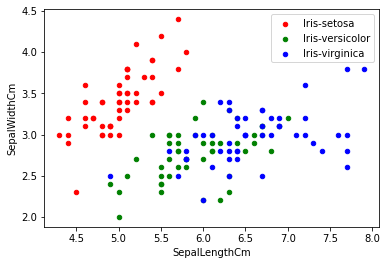

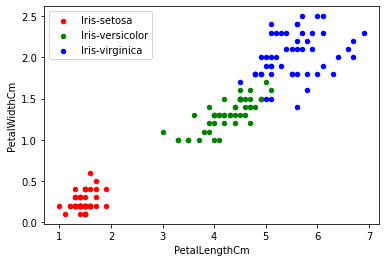

In [5]:

color=['red','green','blue']

for vs in ['Sepal','Petal']:
    x=vs+'LengthCm'
    y=vs+'WidthCm'
    
    fig=data[data.Species==label[0]].plot(kind='scatter',x=x,y=y,label=label[0],color=color[0])

    data[data.Species==label[1]].plot(kind='scatter',x=x,y=y,label=label[1],color=color[1],ax=fig)
    data[data.Species==label[2]].plot(kind='scatter',x=x,y=y,label=label[2],color=color[2],ax=fig)

    plt.show()

## Split dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train,test=train_test_split(data,test_size=0.25)

print(train.shape,test.shape)

train.head(2)

(112, 5) (38, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
11,4.8,3.4,1.6,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica


In [8]:
train_X=train.drop('Species',axis=1)
train_y=train.Species

test_X=test.drop('Species',axis=1)
test_y=test.Species

### Checking Class Imbalance

In [9]:
for i in range(3):
    print(label[i],int(data[data.Species==label[i]].Species.value_counts()))

Iris-setosa 50
Iris-versicolor 50
Iris-virginica 50


## Model Building

In [10]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics

In [11]:
model=knn(n_neighbors=3,algorithm='auto')

history=model.fit(train_X,train_y)

In [12]:
pred=model.predict(test_X)
'Accuracy Score: ',metrics.accuracy_score(pred,test_y)

('Accuracy Score: ', 0.9736842105263158)